In [ ]:
import re
from tika import parser
from os import listdir
from os.path import isfile, join
import shutil
import pandas as pd
source_folder = './text'
new_list = []
report_df = pd.DataFrame(columns = ['bank','date','title'])

pdf_files = [f for f in listdir(source_folder) if isfile(join(source_folder, f))]
print(pdf_files[0].split('_')[1])
for i in pdf_files:
    try:
        sub = open('./text/'+i,'r',encoding = 'utf-8')
        new_list.append({
            'bank_name':i.split('_')[0],
            'date':i.split('_')[1],
            'title':i.split('_')[2],
            'sub':sub.read().replace('\n',' ')
        })
        sub.close()
    except Exception as e:
        print(i)
        print(e)
        pass

In [ ]:
len(new_list)

In [ ]:
report_df = pd.DataFrame(columns = ['bank','date','title','sub'])
report_df= pd.DataFrame(new_list)
report_df = report_df[['date','bank_name','title','sub']]
for i in range(len(report_df['date'])):
    report_df['date'][i] = '20'+report_df['date'][i]
#     print(report_df['date'][i])
# report_df.index = report_df['date']
# report_df = report_df.drop(columns = ['date'])
# report_df.index = pd.DatetimeIndex(report_df.index)
# report_df.loc['2016-08-22','ngrams'] = ''
# report_df.loc['2016-08-22','tokens'] = ''
# report_df.loc['2016-08-22','score'] = ''

In [ ]:
report_df.to_csv('bondreport.csv')

In [ ]:
from ekonlpy.sentiment import MPCK
error = 0
for idx,text in enumerate(report_df['sub']):
    
    mpck = MPCK()
    try:
        bef_tokens = mpck.tokenize(text)

        ngrams = mpck.ngramize(bef_tokens)

        tokens = []

        stoppos = ['SC','SY','SF','SE','SS','SP','SO','SW','SSC','JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JX','JC','EF','EC','ETN','ETM']
        stopword = ['']

        for tag in bef_tokens:
            if tag[1] not in stoppos:
                if tag[0] not in stopword:
                    tokens.append(tag)
            report_df.loc['2016-08-22','ngrams'] = ''
            report_df.loc['2016-08-22','tokens'] = ''

            report_df['ngrams'][idx] = ngrams
            report_df['tokens'][idx] = tokens
        if idx%100 == 0:
            print(idx)
    except Exception as e:
        print(e)
        error += 1 
        print('error : ',error)
report_df.to_csv('채권분석_ngram.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('채권분석_ngram.csv',index_col = 0,header = 0)

In [ ]:
df = df.sort_values(['date'])

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
call_rate = pd.read_csv('call_rate.csv',index_col = 0, header = 0)

In [ ]:
call_rate = pd.read_csv('call_rate.csv',sep=' ')

In [ ]:
call_rate['date'] = pd.to_datetime(call_rate['date'])

In [ ]:
call_rate['date']

In [ ]:
df.loc['2016-08-22']

In [ ]:
df = df.drop(index='2016-08-22')

In [ ]:
type(call_rate['date'])

In [ ]:
join = df.merge(call_rate,on='date',how='left')

In [ ]:
join.columns

In [ ]:
join.to_csv('bondreport_labeling.csv')

In [ ]:
join['label'].values

In [ ]:
df['date'][3096]

In [ ]:
df_bond = join.iloc[:3097].copy()

In [ ]:
df_bond

In [ ]:
g = []
for i,v in enumerate(df_bond['ngrams']):
    print(v)
    print('-'*100)
    if v == []:
        g.append(i)
#     if i['ngrams']==[]:
#         g.append(i)

In [ ]:
len(g)

In [ ]:
len(df_bond)

In [ ]:
import pandas as pd
df_report = pd.read_csv('final_bondreport.csv',index_col=0)


In [ ]:
df_report_1 = df_report['date','ngrams']

In [ ]:
df = df_all.copy()

In [ ]:
for i in range(len(df)):
    try:
        df['ngrams'].iloc[i] = df_1['ngrams'][i].replace('[','').replace(']','').replace("'",'')

    except Exception as e:
        print(e)
        print(i)

In [ ]:
for i in range(len(df_all)):
    try:
        df['ngram'].iloc[i] = df_all['ngram'][i].replace('[','').replace(']','').replace("'",'').replace(' ','')

    except Exception as e:
        print(e)
        print(i)

In [ ]:
for i in range(len(df_1)):
    try:
        df['ngrams'].iloc[i] = df_1['ngrams'].iloc[i] +df_1['tokens'].iloc[i]
        print(len(df_1['ngrams'].iloc[i]),'+',len(df_1['tokens'].iloc[i]) ,'=',len(df['ngrams'].iloc[i]))
        if i%100 ==0:
            print((i/len(df_1)*100,'%'))
            
    except Exception as e:
        print(e)
        print(i)

In [ ]:
df.to_csv('realfinal_bondreport.csv')

In [ ]:
df = pd.read_csv('realfinal_bondreport.csv',index_col=0)

In [ ]:
df_report = df[['date','ngrams','label']]

In [ ]:
for i in range(len(df_report)):
    try:
        df_report['ngram'][i] = df_report['ngram'][i].replace('[','').replace(']','').replace("'",'').replace(' ','')
    except Exception as e:
        print(e,i)

# 의사록,채권분석보고서,뉴스 ngram 합치기

In [194]:
df_mpb = pd.read_csv('MPB_ngram_label.csv',index_col=0)
df_news = pd.read_csv('news_Ng_labels.csv',index_col = 0)
df_report = pd.read_csv('채권분석보고서ngram.csv',index_col=0)
df_mpb = df_mpb.drop(156,axis=0)


df_report.columns=['date','ngram','label']
df_mpb.columns=['date','ngram','label']
df_news.columns=['date','ngram','label']

In [195]:
df_mpb.shape

(147, 3)

In [196]:
df_news.shape

(234094, 3)

In [197]:
df_report.shape

(3097, 3)

In [198]:
df_rm = df_report.append(df_mpb)
df_all=df_rm.append(df_news)
print(len(df_report),len(df_mpb),len(df_news),len(df_all))

3097 147 234094 237338


In [201]:
df_all.to_csv('ngram_all.csv')

# 엔그램 분할 및 라벨링

In [202]:
import pandas as pd
df_all = pd.read_csv('ngram_all.csv',index_col = 0)

ngram_count = pd.DataFrame(columns = ['ngram','label'])
pos_ngram = []
neg_ngram = []
neu_ngram = []
pos_df = df_all.loc[df_all['label'] == 1.0,:]
neg_df = df_all.loc[df_all['label'] ==-1.0,:]
neu_df = df_all.loc[df_all['label'] == 0.0,:]


In [203]:
pos_df.shape

(95776, 3)

In [204]:
pos_df.head()

,date,ngram,label
0,2008-04-01,"미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG,경기/NNG;개선/...",1.0
1,2008-04-07,"글로벌/NNG;신용경색/NNG;완화/NNG,단기/NNG;인플레이션/NNG;우려/NN...",1.0
2,2008-04-07,"글로벌/NNG;신용경색/NNG;완화/NNG,단기/NNG;인플레이션/NNG;우려/NN...",1.0
3,2008-04-14,"예상/NNG;경제/NNG;성장률/NNG;하향/NNG,금리/NNG;인하/NNG;기대/...",1.0
6,2008-05-04,"미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG,국제/NNG;유가/...",1.0


In [205]:
neg_df.head()

,date,ngram,label
4,2008-04-21,"미/NNG;국채/NNG;금리/NNG;안전자산/NNG;선호/NNG,금리/NNG;인하/...",-1.0
5,2008-04-28,"fed/NNG;원자재/NNG;가격/NNG;상승/NNG,원자재/NNG;가격/NNG;상...",-1.0
7,2008-05-13,"인하/NNG;기대/NNG;금리/NNG;하락/NNG,국제/NNG;상품/NNG;가격/N...",-1.0
8,2008-05-19,"물가/NNG;상승/NNG;압력/NNG;금리/NNG;상승/NNG,호조/NNG;기대/N...",-1.0
9,2008-05-20,"금리/NNG;상승/NNG;환율/NNG;상승/NNG,채권/NNG;매수/NNG;심리/N...",-1.0


In [206]:
import pandas as pd
df_all = pd.read_csv('ngram_all.csv',index_col = 0)

ngram_count = pd.DataFrame(columns = ['ngram','label'])
pos_ngram = []
neg_ngram = []
neu_ngram = []
pos_df = df_all.loc[df_all['label'] == 1.0,:]
neg_df = df_all.loc[df_all['label'] ==-1.0,:]
neu_df = df_all.loc[df_all['label'] == 0.0,:]


for i in range(len(pos_df)):
    try:
        pos_ngram += pos_df['ngram'].iloc[i].split(',')
        if i%100==0:
            print((i/len(pos_df))*100,'%')
    except Exception as e:
        print(e,i)
        
        
for i in range(len(neg_df)):
    try:
        neg_ngram += neg_df['ngram'].iloc[i].split(',')
        if i%100==0:
            print((i/len(neg_df))*100,'%')
    except Exception as e:
        print(e,i)
        
for i in range(len(neu_df)):
    try:
        neu_ngram += neu_df['ngram'].iloc[i].split(',')
        if i%100==0:
            print((i/len(neu_df))*100,'%')
    except Exception as e:
        print(e,i)

0.0 %
0.10441029067824925 %
0.2088205813564985 %
'float' object has no attribute 'split' 288
0.31323087203474775 %
0.417641162712997 %
0.5220514533912463 %
0.6264617440694955 %
0.7308720347477448 %
0.835282325425994 %
0.9396926161042433 %
'float' object has no attribute 'split' 976
'float' object has no attribute 'split' 977
1.0441029067824925 %
'float' object has no attribute 'split' 1099
1.1485131974607417 %
1.252923488138991 %
1.3573337788172402 %
1.4617440694954895 %
1.5661543601737387 %
1.670564650851988 %
1.7749749415302372 %
1.8793852322084865 %
1.9837955228867357 %
2.088205813564985 %
2.192616104243234 %
2.2970263949214833 %
2.401436685599733 %
2.505846976277982 %
2.610257266956231 %
2.7146675576344803 %
2.81907784831273 %
2.923488138990979 %
3.027898429669228 %
3.1323087203474773 %
3.2367190110257265 %
3.341129301703976 %
3.4455395923822256 %
3.5499498830604743 %
3.6543601737387235 %
3.758770464416973 %
3.8631807550952217 %
3.9675910457734713 %
4.072001336451721 %
4.1764116271

44.47878382893418 %
44.58319411961243 %
44.687604410290675 %
44.79201470096893 %
44.89642499164718 %
45.000835282325426 %
45.10524557300368 %
45.209655863681924 %
45.31406615436017 %
45.41847644503842 %
45.522886735716675 %
45.62729702639492 %
45.73170731707317 %
45.83611760775142 %
45.940527898429664 %
46.04493818910792 %
46.14934847978617 %
46.253758770464415 %
46.35816906114267 %
46.462579351820914 %
46.56698964249916 %
46.67139993317741 %
46.775810223855665 %
46.88022051453391 %
46.98463080521216 %
47.08904109589041 %
47.19345138656866 %
47.297861677246914 %
47.40227196792516 %
47.506682258603405 %
47.61109254928166 %
47.7155028399599 %
47.819913130638156 %
47.92432342131641 %
48.028733711994654 %
48.1331440026729 %
48.23755429335115 %
48.3419645840294 %
48.44637487470765 %
48.5507851653859 %
48.65519545606415 %
48.7596057467424 %
48.86401603742065 %
48.96842632809889 %
49.072836618777146 %
49.1772469094554 %
49.281657200133644 %
49.3860674908119 %
49.49047778149014 %
49.5948880721

88.01787504176411 %
88.12228533244236 %
88.2266956231206 %
88.33110591379887 %
88.43551620447711 %
88.53992649515536 %
88.64433678583362 %
88.74874707651186 %
88.85315736719011 %
88.95756765786837 %
89.06197794854661 %
89.16638823922486 %
89.2707985299031 %
89.37520882058135 %
89.4796191112596 %
89.58402940193785 %
89.6884396926161 %
89.79284998329436 %
89.8972602739726 %
90.00167056465085 %
90.1060808553291 %
90.21049114600736 %
90.3149014366856 %
90.41931172736385 %
90.5237220180421 %
90.62813230872034 %
90.73254259939858 %
90.83695289007684 %
90.9413631807551 %
91.04577347143335 %
91.1501837621116 %
91.25459405278984 %
91.3590043434681 %
91.46341463414635 %
91.56782492482459 %
91.67223521550284 %
91.77664550618108 %
91.88105579685933 %
91.98546608753759 %
92.08987637821583 %
92.1942866688941 %
92.29869695957234 %
92.40310725025059 %
92.50751754092883 %
92.61192783160709 %
92.71633812228534 %
92.82074841296358 %
92.92515870364183 %
93.02956899432007 %
93.13397928499832 %
93.238389575

33.52535160101718 %
33.629145259224664 %
33.73293891743214 %
33.83673257563963 %
33.94052623384711 %
34.044319892054595 %
34.148113550262075 %
34.25190720846956 %
34.35570086667705 %
34.45949452488453 %
34.56328818309201 %
34.6670818412995 %
34.77087549950698 %
34.874669157714465 %
34.978462815921944 %
35.08225647412943 %
35.186050132336916 %
35.289843790544396 %
35.39363744875188 %
35.49743110695937 %
35.60122476516685 %
35.70501842337433 %
35.80881208158181 %
35.9126057397893 %
36.016399397996786 %
36.120193056204265 %
36.22398671441175 %
36.32778037261923 %
36.43157403082672 %
36.535367689034196 %
36.63916134724168 %
36.74295500544917 %
36.846748663656655 %
36.950542321864134 %
37.05433598007162 %
37.1581296382791 %
37.26192329648658 %
37.365716954694065 %
37.46951061290155 %
37.57330427110904 %
37.67709792931652 %
37.780891587524 %
37.88468524573149 %
37.98847890393897 %
38.09227256214645 %
38.196066220353934 %
38.29985987856142 %
38.40365353676891 %
38.507447194976386 %
38.6112408

76.49592609891536 %
76.59971975712284 %
76.70351341533032 %
76.80730707353781 %
76.91110073174528 %
77.01489438995277 %
77.11868804816025 %
77.22248170636774 %
77.32627536457522 %
77.4300690227827 %
77.5338626809902 %
77.63765633919768 %
77.74144999740516 %
77.84524365561263 %
77.94903731382013 %
78.0528309720276 %
78.1566246302351 %
78.26041828844258 %
78.36421194665006 %
78.46800560485754 %
78.57179926306502 %
78.67559292127251 %
78.77938657947999 %
78.88318023768748 %
78.98697389589496 %
79.09076755410244 %
79.19456121230994 %
79.2983548705174 %
79.4021485287249 %
79.50594218693237 %
79.60973584513987 %
79.71352950334735 %
79.81732316155484 %
79.92111681976232 %
80.0249104779698 %
80.12870413617728 %
80.23249779438476 %
80.33629145259225 %
80.44008511079973 %
80.54387876900722 %
80.6476724272147 %
80.75146608542218 %
80.85525974362966 %
80.95905340183714 %
81.06284706004463 %
81.16664071825211 %
81.2704343764596 %
81.37422803466708 %
81.47802169287456 %
81.58181535108206 %
81.685609

41.35612712033085 %
41.57728288033262 %
41.79843864033439 %
42.01959440033616 %
42.240750160337925 %
42.461905920339696 %
42.68306168034147 %
42.90421744034323 %
43.125373200345 %
43.34652896034677 %
43.567684720348545 %
43.78884048035031 %
44.00999624035208 %
44.23115200035385 %
44.452307760355616 %
44.67346352035739 %
44.89461928035915 %
45.11577504036093 %
45.336930800362694 %
45.558086560364465 %
45.77924232036623 %
46.00039808036801 %
46.22155384036977 %
46.44270960037154 %
46.663865360373315 %
46.88502112037508 %
47.10617688037685 %
47.327332640378614 %
47.54848840038039 %
47.76964416038216 %
47.99079992038393 %
48.21195568038569 %
48.433111440387464 %
48.654267200389235 %
48.875422960391 %
49.09657872039278 %
49.31773448039454 %
49.53889024039631 %
49.76004600039808 %
49.98120176039985 %
50.20235752040162 %
50.423513280403384 %
50.644669040405155 %
50.86582480040692 %
51.086980560408705 %
51.30813632041047 %
51.52929208041223 %
51.750447840414004 %
51.971603600415776 %
52.192759

In [207]:
pos_ngram_df = pd.DataFrame(pos_ngram,columns=['ngram'])
neg_ngram_df = pd.DataFrame(neg_ngram,columns=['ngram'])
neu_ngram_df = pd.DataFrame(neu_ngram,columns=['ngram'])

pos_ngram_df['label'] = 1
neg_ngram_df['label'] = -1
neu_ngram_df['label'] = 0

ngramlist = neu_ngram_df.append(neg_ngram_df)
ngramlist = ngramlist.append(pos_ngram_df)
# ngramlist.to_csv('라벨링된엔그램.csv')

b = ngramlist['ngram'].value_counts()
b = pd.DataFrame(b)
b['word'] = b.index



In [244]:
ngramlist.head()

,ngram,label
0,여전/NNG;안전자산/NNG;선호/NNG,0
1,금리/NNG;상승/NNG;반납/NNG,0
2,단기/NNG;금리/NNG;상승/NNG,0
3,미/NNG;금리/NNG;하락/NNG,0
4,안정/NNG;기대/NNG;높/VV,0


In [245]:
ngramlist['ngram'] = ngramlist['ngram'].str.strip()

In [246]:
b = ngramlist['ngram'].value_counts()

In [250]:
b = pd.DataFrame(b)

In [255]:
b[b['ngram'] >= 15].shape

(46961, 1)

In [241]:
len(set(b['word'].str.strip()))

339131

In [ ]:

#15개 이상 뽑아오기
ngram_count_dff = b.loc[b['ngram'] >= 15,:]
# ngram_count_dff.to_csv('15개이상엔그램사전.csv')

words = []
for i in ngram_count_dff.index:
    words.append(i)
    

#사전에서 15개 이하 삭제

ngram_fif_count = ngramlist[ngramlist['ngram'].isin(words)]


In [139]:
pos = ngram_fif_count.loc[ngram_fif_count['label']==1,:]
neu = ngram_fif_count.loc[ngram_fif_count['label']==0,:]
neg = ngram_fif_count.loc[ngram_fif_count['label']==-1,:]

In [140]:
words_pos = pos['ngram'].value_counts()
words_neg = neg['ngram'].value_counts()

words_pos = pd.DataFrame(words_pos)
words_neg = pd.DataFrame(words_neg)

words_pos['word'] = words_pos.index
words_neg['word'] = words_neg.index

words_pos.columns = ['pos_count','word']
words_neg.columns = ['neg_count','word']

words_pol = words_pos.merge(words_neg,how='outer',on ='word')

len(words_pol)

48685

In [141]:
words_pol = words_pol[['word','pos_count','neg_count']]

# Naive Bayes Classifier

In [142]:
pos_len = len(pos)
neg_len = len(neg)

In [143]:
dic_score ={}
for i in range(len(words_pol)):
    try:
        dic_score[words_pol['word'].iloc[i]] = ((words_pol['pos_count'].iloc[i])/pos_len)/(words_pol['neg_count'].iloc[i]/neg_len)
#         words_pol['score'].iloc[i] = ((words_pol['pos_count'].iloc[i])/pos_len)/(words_pol['neg_count'].iloc[i]/neg_len)
        if i%500 == 0:
            print((i/len(words_pol)*100,'%'))
    except Exception as e:
        print(e,i)

(0.0, '%')
(1.0270103728047653, '%')
(2.0540207456095305, '%')
(3.081031118414296, '%')
(4.108041491219061, '%')
(5.1350518640238265, '%')
(6.162062236828592, '%')
(7.189072609633357, '%')
(8.216082982438122, '%')
(9.243093355242888, '%')
(10.270103728047653, '%')
(11.297114100852419, '%')
(12.324124473657184, '%')
(13.351134846461948, '%')
(14.378145219266713, '%')
(15.405155592071479, '%')
(16.432165964876244, '%')
(17.459176337681008, '%')
(18.486186710485775, '%')
(19.51319708329054, '%')
(20.540207456095306, '%')
(21.567217828900073, '%')
(22.594228201704837, '%')
(23.621238574509604, '%')
(24.648248947314368, '%')
(25.67525932011913, '%')
(26.702269692923895, '%')
(27.729280065728663, '%')
(28.756290438533426, '%')
(29.783300811338194, '%')
(30.810311184142957, '%')
(31.837321556947725, '%')
(32.86433192975249, '%')
(33.891342302557256, '%')
(34.918352675362016, '%')
(35.94536304816678, '%')
(36.97237342097155, '%')
(37.99938379377632, '%')
(39.02639416658108, '%')
(40.0534045393

In [148]:
score = pd.DataFrame.from_dict(dic_score,orient='index')
score['word'] = score.index
score = score.reset_index()
score = score.drop(columns = ['index'])
score['score'] = score[0]
score = score.drop(columns = [0])

In [149]:
words_pol = words_pol.merge(score,how='outer',on = 'word')
words_pol = words_pol.fillna(0)

In [160]:
score_pos = words_pol.loc[words_pol['score'] >= 1.3,:]
score_neg = words_pol.loc[words_pol['score'] <= 0.77,:]

In [180]:
# score_neg[score_neg.score < 0.77].sort_values('neg_count', ascending= False)
score_pos[score_pos['word'].str.contains(';')].sort_values('pos_count', ascending= False)

,word,pos_count,neg_count,score
1323,인플레이션/NNG;우려/NNG,1704.0,1287.0,1.357038
1504,콜/NNG;금리/NNG;인상/NNG,1406.0,729.0,1.976782
1728,인플레이션/NNG;압력/NNG,1162.0,820.0,1.452423
1849,지정학/NNG;위험/NNG,1048.0,716.0,1.500200
2023,인플레이션/NNG;억제/NNG,902.0,540.0,1.712039
2222,지준율/NNG;인상/NNG,793.0,420.0,1.935195
2300,물가/NNG;상승/NNG;압력/NNG,755.0,562.0,1.376929
2336,통화/NNG;긴축/NNG,744.0,572.0,1.333146
2344,가격/NNG;부담/NNG,740.0,574.0,1.321359
2422,서브프라임/NNG;부실/NNG,707.0,486.0,1.491022


In [ ]:
score.to_csv('앤그램파분리전.csv')

In [ ]:
score_pos.to_csv('비둘기파.csv')
score_neg.to_csv('매파.csv')

In [ ]:
score_pos.sort_values(0)

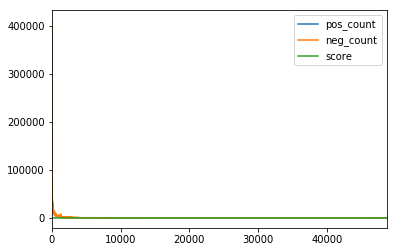

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
words_pol.plot.line()

-0.01296986641814228